# **Importing packages**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Preparing the datasets to work**

## **Importing and reading the dataset of COVID-19 daily evolution**

In [ ]:
main_dataset = pd.read_csv("worldometer_coronavirus_daily_data.csv", sep = ",")
main_dataset

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
184782,2022-5-10,Zimbabwe,248642.0,106.0,963.0,5481.0,2.0
184783,2022-5-11,Zimbabwe,248778.0,136.0,1039.0,5481.0,0.0
184784,2022-5-12,Zimbabwe,248943.0,165.0,1158.0,5481.0,0.0
184785,2022-5-13,Zimbabwe,249131.0,188.0,1283.0,5482.0,1.0


## **Importing and reading the dataset of total population in each country**

In [ ]:
population_total = pd.read_csv("population.csv", sep = ",")
population_total = population_total[["country", "population"]]
population_total = population_total.reset_index()
population_total.drop(columns = ["index"], inplace = True)
population_total = population_total.set_index("country")

## **Creating a new DataFrame with numbers about active cases in each country in most recently day on dataset**

In [ ]:
active_cases_covid = main_dataset[["date", "country", "active_cases"]].copy()
active_cases_covid["date"] = pd.to_datetime(active_cases_covid["date"], format= "%Y-%m-%d")

#Selecting the most recently day present in each country
last_date = active_cases_covid.groupby(["country"])["date"].transform(max) == active_cases_covid["date"]
active_cases_covid = active_cases_covid[last_date]

#Reseting the index, rewriting with the name of countries, and deleting the previous column "index"
active_cases_covid = active_cases_covid.reset_index()
active_cases_covid.drop(columns = ["index"], inplace = True)
active_cases_covid = active_cases_covid.set_index("country")
active_cases_covid.head(10)

,date,active_cases
country,,
Afghanistan,2022-05-14,9398.0
Albania,2022-05-14,251.0
Algeria,2022-05-14,80570.0
Andorra,2022-05-14,982.0
Angola,2022-05-14,145.0
Anguilla,2022-05-14,59.0
Antigua And Barbuda,2022-05-14,73.0
Argentina,2022-05-14,76591.0
Armenia,2022-05-14,2225.0


## **Creating another DataFrame with total cases and deaths in each country**

In [ ]:
sum_total_cases_covid_country = main_dataset[["country", "daily_new_cases", "daily_new_deaths"]]
sum_total_cases_covid_country = sum_total_cases_covid_country.groupby("country").sum()
sum_total_cases_covid_country.head(10)

,daily_new_cases,daily_new_deaths
country,,
Afghanistan,179242.0,7690.0
Albania,275572.0,3496.0
Algeria,265815.0,6875.0
Andorra,42155.0,153.0
Angola,99193.0,1898.0
Anguilla,2982.0,8.0
Antigua And Barbuda,7720.0,136.0
Argentina,9101318.0,128728.0
Armenia,422895.0,8623.0


## **Joining two DataFrames, with total of cases, deaths and the active cases in most recently day**

In [ ]:
total_cases_covid_country = pd.merge(sum_total_cases_covid_country, active_cases_covid, left_index = True, right_index = True).merge(population_total, on = "country")
total_cases_covid_country.drop(columns = ["date"], inplace = True)
total_cases_covid_country.rename(columns = {"daily_new_cases" : "total_cases", "daily_new_deaths" : "total_deaths"}, inplace = True)
total_cases_covid_country.head(10)

,total_cases,total_deaths,active_cases,population
country,,,,
Afghanistan,179242.0,7690.0,9398.0,39074280
Albania,275572.0,3496.0,251.0,2877239
Algeria,265815.0,6875.0,80570.0,43984569
Andorra,42155.0,153.0,982.0,77287
Angola,99193.0,1898.0,145.0,33032075
Anguilla,2982.0,8.0,59.0,15026
Argentina,9101318.0,128728.0,76591.0,45267449
Armenia,422895.0,8623.0,2225.0,2964219
Aruba,35691.0,212.0,281.0,106845


## **Calculation the incidence rate and mortality rate**

In [ ]:
total_cases_covid_country["incidence_rate"] = total_cases_covid_country["total_cases"] / total_cases_covid_country["population"] * 100000
total_cases_covid_country["mortality_rate"] = total_cases_covid_country["total_deaths"] / total_cases_covid_country["population"] * 100000
total_cases_covid_country.head(10)

,total_cases,total_deaths,active_cases,population,incidence_rate,mortality_rate
country,,,,,,
Afghanistan,179242.0,7690.0,9398.0,39074280,458.721184,19.680465
Albania,275572.0,3496.0,251.0,2877239,9577.654133,121.505374
Algeria,265815.0,6875.0,80570.0,43984569,604.336944,15.630482
Andorra,42155.0,153.0,982.0,77287,54543.454915,197.963435
Angola,99193.0,1898.0,145.0,33032075,300.292973,5.745930
Anguilla,2982.0,8.0,59.0,15026,19845.600958,53.241049
Argentina,9101318.0,128728.0,76591.0,45267449,20105.656937,284.372110
Armenia,422895.0,8623.0,2225.0,2964219,14266.658435,290.902933
Aruba,35691.0,212.0,281.0,106845,33404.464411,198.418269


## **Creating a DataFrame with the cases evolution along the time since 2020**

In [ ]:
evolution_cases_covid_country = main_dataset[["date", "country", "daily_new_cases", "active_cases", "daily_new_deaths"]].copy()
evolution_cases_covid_country["date"] = pd.to_datetime(evolution_cases_covid_country["date"], format= "%Y-%m-%d")
evolution_cases_covid_country

,date,country,daily_new_cases,active_cases,daily_new_deaths
0,2020-02-15,Afghanistan,NaN,0.0,NaN
1,2020-02-16,Afghanistan,NaN,0.0,NaN
2,2020-02-17,Afghanistan,NaN,0.0,NaN
3,2020-02-18,Afghanistan,NaN,0.0,NaN
4,2020-02-19,Afghanistan,NaN,0.0,NaN
...,...,...,...,...,...
184782,2022-05-10,Zimbabwe,106.0,963.0,2.0
184783,2022-05-11,Zimbabwe,136.0,1039.0,0.0
184784,2022-05-12,Zimbabwe,165.0,1158.0,0.0
184785,2022-05-13,Zimbabwe,188.0,1283.0,1.0


## **Importing a DataFrame with the total vaccination around the world**

In [ ]:
covid_vaccinated = pd.read_csv("vaccinations.csv")
covid_vaccinated["date"] = pd.to_datetime(covid_vaccinated["date"], format= "%Y-%m-%d")
covid_vaccinated

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102761,Zimbabwe,ZWE,2022-05-14,11153964.0,6067791.0,4191100.0,895073.0,147695.0,86306.0,73.91,40.20,27.77,5.93,5719.0,22547.0,0.149
102762,Zimbabwe,ZWE,2022-05-15,11336359.0,6117318.0,4299107.0,919934.0,182395.0,103783.0,75.11,40.53,28.49,6.10,6877.0,27868.0,0.185
102763,Zimbabwe,ZWE,2022-05-16,11456837.0,6153538.0,4366541.0,936758.0,120478.0,119063.0,75.91,40.77,28.93,6.21,7889.0,32116.0,0.213
102764,Zimbabwe,ZWE,2022-05-17,11489104.0,6166141.0,4380681.0,942282.0,32267.0,107103.0,76.13,40.86,29.03,6.24,7097.0,30372.0,0.201


## **Choosing the mainly information about the vaccination to put in the dataset**

In [ ]:
covid_vaccinated_world = covid_vaccinated[["location", "date", "total_vaccinations", "people_vaccinated", "people_fully_vaccinated",  "total_boosters", "daily_vaccinations_raw"]]
covid_vaccinated_world

,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,NaN
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
102761,Zimbabwe,2022-05-14,11153964.0,6067791.0,4191100.0,895073.0,147695.0
102762,Zimbabwe,2022-05-15,11336359.0,6117318.0,4299107.0,919934.0,182395.0
102763,Zimbabwe,2022-05-16,11456837.0,6153538.0,4366541.0,936758.0,120478.0
102764,Zimbabwe,2022-05-17,11489104.0,6166141.0,4380681.0,942282.0,32267.0


## **As well as the number of COVID-19 cases dataframes, It was made a new dataframe with total of vaccination number in each country in the most recent date present in dataset**

In [ ]:
last_date = covid_vaccinated_world.groupby(["location"])["date"].transform(max) == covid_vaccinated_world["date"]
total_covid_vaccinated_world = covid_vaccinated_world[last_date]

total_covid_vaccinated_world = total_covid_vaccinated_world.reset_index()
total_covid_vaccinated_world.drop(columns = ["index"], inplace = True)
total_covid_vaccinated_world = total_covid_vaccinated_world.set_index("location")
total_covid_vaccinated_world

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw
location,,,,,,
Afghanistan,2022-05-15,6.066579e+06,5.359930e+06,4.710456e+06,NaN,NaN
Africa,2022-05-19,4.974869e+08,3.072735e+08,2.342889e+08,2.373727e+07,NaN
Albania,2022-05-01,2.825500e+06,1.299321e+06,1.230636e+06,2.955430e+05,NaN
Algeria,2022-05-01,1.520585e+07,7.840131e+06,6.481186e+06,5.140630e+05,NaN
Andorra,2022-05-01,1.526940e+05,5.787400e+04,5.342700e+04,4.139300e+04,NaN
...,...,...,...,...,...,...
Wallis and Futuna,2022-05-02,1.642600e+04,NaN,NaN,3.201000e+03,NaN
World,2022-05-19,1.174946e+10,5.171542e+09,4.704080e+09,1.938782e+09,NaN
Yemen,2022-05-11,8.286870e+05,6.630040e+05,4.256190e+05,NaN,NaN


## **Joining the information about total population in the countries in world vaccination dataset** 

In [ ]:
total_covid_vaccinated_world = total_covid_vaccinated_world.join(population_total)
total_covid_vaccinated_world

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,population
location,,,,,,,
Afghanistan,2022-05-15,6.066579e+06,5.359930e+06,4.710456e+06,NaN,NaN,39074280.0
Africa,2022-05-19,4.974869e+08,3.072735e+08,2.342889e+08,2.373727e+07,NaN,NaN
Albania,2022-05-01,2.825500e+06,1.299321e+06,1.230636e+06,2.955430e+05,NaN,2877239.0
Algeria,2022-05-01,1.520585e+07,7.840131e+06,6.481186e+06,5.140630e+05,NaN,43984569.0
Andorra,2022-05-01,1.526940e+05,5.787400e+04,5.342700e+04,4.139300e+04,NaN,77287.0
...,...,...,...,...,...,...,...
Wallis and Futuna,2022-05-02,1.642600e+04,NaN,NaN,3.201000e+03,NaN,NaN
World,2022-05-19,1.174946e+10,5.171542e+09,4.704080e+09,1.938782e+09,NaN,NaN
Yemen,2022-05-11,8.286870e+05,6.630040e+05,4.256190e+05,NaN,NaN,29935468.0


## **However, there are some index differences because each dataset has a different name written. So let's fix the names manually to connect the information**

In [ ]:
def rename_country(country):
	if country == "Bonaire Sint Eustatius and Saba":
		return "Caribbean Netherlands"
	if country == "Cape Verde":
		return "Cabo Verde"
	if country == "Cote d'Ivoire":
		return "Côte d'Ivoire"
	if country == "Curacao":
		return "Curaçao"	
	if country == "Czechia":
		return "Czech Republic"	
	if country == "Democratic Republic of Congo":
		return "DR Congo"	
	if country == "Palestine":
		return "State of Palestine"	
	if country == "Saint Kitts and Nevis":
		return "Saint Kitts & Nevis"	
	if country == "Saint Vincent and the Grenadines":
		return "St. Vincent & Grenadines"	
	if country == "Sao Tome and Principe":
		return "Sao Tome & Principe"	
	if country == "Sint Maarten (Dutch part)":
		return "Sint Maarten"	
	if country == "Timor":
		return "Timor-Leste"	
	if country == "Turks and Caicos Islands":
		return "Turks and Caicos"	
	if country == "Wallis and Futuna":
		return "Wallis & Futuna"
	return country

total_covid_vaccinated_world["correct_location"] = total_covid_vaccinated_world.index.map(rename_country)
total_covid_vaccinated_world

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,population,correct_location
location,,,,,,,,
Afghanistan,2022-05-15,6.066579e+06,5.359930e+06,4.710456e+06,NaN,NaN,39074280.0,Afghanistan
Africa,2022-05-19,4.974869e+08,3.072735e+08,2.342889e+08,2.373727e+07,NaN,NaN,Africa
Albania,2022-05-01,2.825500e+06,1.299321e+06,1.230636e+06,2.955430e+05,NaN,2877239.0,Albania
Algeria,2022-05-01,1.520585e+07,7.840131e+06,6.481186e+06,5.140630e+05,NaN,43984569.0,Algeria
Andorra,2022-05-01,1.526940e+05,5.787400e+04,5.342700e+04,4.139300e+04,NaN,77287.0,Andorra
...,...,...,...,...,...,...,...,...
Wallis and Futuna,2022-05-02,1.642600e+04,NaN,NaN,3.201000e+03,NaN,NaN,Wallis & Futuna
World,2022-05-19,1.174946e+10,5.171542e+09,4.704080e+09,1.938782e+09,NaN,NaN,World
Yemen,2022-05-11,8.286870e+05,6.630040e+05,4.256190e+05,NaN,NaN,29935468.0,Yemen


In [ ]:
total_covid_vaccinated_world = total_covid_vaccinated_world.reset_index()
total_covid_vaccinated_world.drop(columns = ["location"], inplace = True)
total_covid_vaccinated_world = total_covid_vaccinated_world.set_index("correct_location")
total_covid_vaccinated_world = total_covid_vaccinated_world.rename_axis("country")
total_covid_vaccinated_world

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,population
country,,,,,,,
Afghanistan,2022-05-15,6.066579e+06,5.359930e+06,4.710456e+06,NaN,NaN,39074280.0
Africa,2022-05-19,4.974869e+08,3.072735e+08,2.342889e+08,2.373727e+07,NaN,NaN
Albania,2022-05-01,2.825500e+06,1.299321e+06,1.230636e+06,2.955430e+05,NaN,2877239.0
Algeria,2022-05-01,1.520585e+07,7.840131e+06,6.481186e+06,5.140630e+05,NaN,43984569.0
Andorra,2022-05-01,1.526940e+05,5.787400e+04,5.342700e+04,4.139300e+04,NaN,77287.0
...,...,...,...,...,...,...,...
Wallis & Futuna,2022-05-02,1.642600e+04,NaN,NaN,3.201000e+03,NaN,NaN
World,2022-05-19,1.174946e+10,5.171542e+09,4.704080e+09,1.938782e+09,NaN,NaN
Yemen,2022-05-11,8.286870e+05,6.630040e+05,4.256190e+05,NaN,NaN,29935468.0


## **Selecting the countries where have information of total population and total of people fully vaccinated**

In [ ]:
total_covid_vaccinated_world = total_covid_vaccinated_world[total_covid_vaccinated_world["population"].notna()]
total_covid_vaccinated_world = total_covid_vaccinated_world.query("people_fully_vaccinated > 0")
total_covid_vaccinated_world

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,population
country,,,,,,,
Afghanistan,2022-05-15,6066579.0,5359930.0,4710456.0,NaN,NaN,39074280.0
Albania,2022-05-01,2825500.0,1299321.0,1230636.0,295543.0,NaN,2877239.0
Algeria,2022-05-01,15205854.0,7840131.0,6481186.0,514063.0,NaN,43984569.0
Andorra,2022-05-01,152694.0,57874.0,53427.0,41393.0,NaN,77287.0
Angola,2022-04-26,17896626.0,12059919.0,6327907.0,369899.0,NaN,33032075.0
...,...,...,...,...,...,...,...
Venezuela,2022-03-25,37860994.0,22157232.0,14287370.0,651502.0,NaN,28421581.0
Vietnam,2022-05-15,216959400.0,82886620.0,78673094.0,55399686.0,NaN,97490013.0
Yemen,2022-05-11,828687.0,663004.0,425619.0,NaN,NaN,29935468.0


## **Calculating the percent of vaccination in the countries**

In [ ]:
total_covid_vaccinated_world["percent_people_fully_vaccinated"] = (total_covid_vaccinated_world["people_fully_vaccinated"] / total_covid_vaccinated_world["population"]) * 100
total_covid_vaccinated_world.sort_values("percent_people_fully_vaccinated", ascending = False)

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,population,percent_people_fully_vaccinated
country,,,,,,,,
Gibraltar,2022-04-21,119855.0,42074.0,41421.0,36360.0,NaN,33689.0,122.951112
Malta,2022-05-18,1290118.0,475989.0,468884.0,379608.0,1064.0,441750.0,106.142388
United Arab Emirates,2022-05-19,24787714.0,9890557.0,9682855.0,5214302.0,3501.0,9910892.0,97.699127
Brunei,2022-05-06,1124061.0,432057.0,409091.0,282887.0,NaN,438202.0,93.356717
Samoa,2022-05-16,477369.0,228234.0,181891.0,67244.0,NaN,198643.0,91.566781
...,...,...,...,...,...,...,...,...
Madagascar,2022-05-15,2369775.0,1290584.0,1156975.0,26792.0,NaN,27808395.0,4.160524
Papua New Guinea,2022-04-18,586000.0,322687.0,263313.0,NaN,NaN,8975531.0,2.933676
Yemen,2022-05-11,828687.0,663004.0,425619.0,NaN,NaN,29935468.0,1.421788


# **Illustrating the informations**

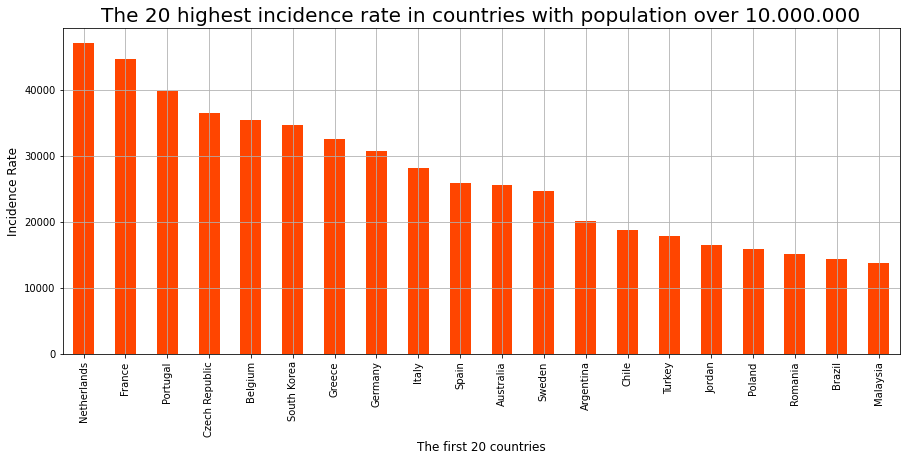

In [119]:
total_cases_covid_country_over_10_million = total_cases_covid_country.query("population >= 10000000")

fig, ax = plt.subplots(1, figsize=(15, 6))
total_cases_covid_country_over_10_million["incidence_rate"].sort_values(ascending = False)[0:20].plot(kind = "bar", color = "orangered")
plt.title("The 20 highest incidence rate in countries with population over 10.000.000", fontsize = 20)
plt.xlabel("The first 20 countries", fontsize = 12)
plt.ylabel("Incidence Rate", fontsize = 12)
plt.grid(True)
plt.show()

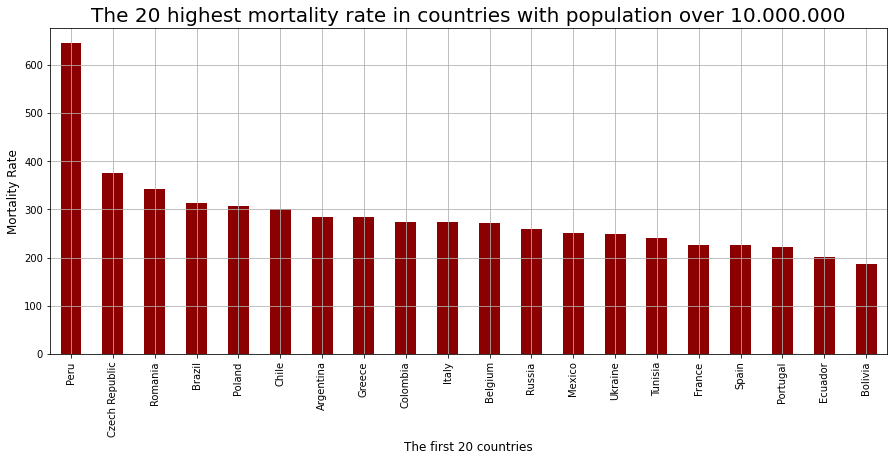

In [120]:
plt.figure(figsize=(15,6))
total_cases_covid_country_over_10_million["mortality_rate"].sort_values(ascending = False)[0:20].plot(kind = "bar", color = "darkred")
plt.title("The 20 highest mortality rate in countries with population over 10.000.000", fontsize = 20)
plt.xlabel("The first 20 countries", fontsize = 12)
plt.ylabel("Mortality Rate", fontsize = 12)
plt.grid(True)
plt.show()

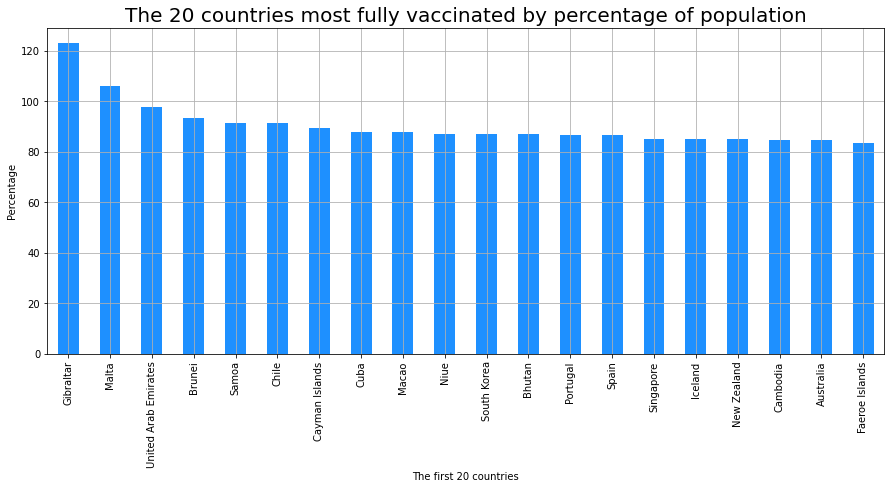

In [121]:
plt.figure(figsize=(15,6))
total_covid_vaccinated_world["percent_people_fully_vaccinated"].sort_values(ascending = False)[0:20].plot(kind = "bar", color = "dodgerblue")
plt.title("The 20 countries most fully vaccinated by percentage of population", fontsize = 20)
plt.xlabel("The first 20 countries")
plt.ylabel("Percentage")
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
total_cases_covid_country_over_10_million["mortality_rate"].sort_values(ascending = False)[0:20].plot(kind = "bar", color = "darkred")
plt.title("The 20 highest mortality rate in countries with population over 10.000.000", fontsize = 20)
plt.grid(True)
plt.show()

## **Calculating the percentage of people vaccinated between that got received the booster dose (3x), completed vaccination (x2), only one dose (x1) and not vaccinated**

In [ ]:
total_covid_vaccinated_world_most_population = total_covid_vaccinated_world.nlargest(20, "population")
graph_covid_vaccinated_world_20_most_population = total_covid_vaccinated_world_most_population[["people_vaccinated", "people_fully_vaccinated", "total_boosters", "population"]].copy()
graph_covid_vaccinated_world_20_most_population["percent_total_boosters"] = total_covid_vaccinated_world_most_population["total_boosters"] / total_covid_vaccinated_world_most_population["population"] * 100
graph_covid_vaccinated_world_20_most_population["percent_people_fully_vaccinated"] = (total_covid_vaccinated_world_most_population["people_fully_vaccinated"] - total_covid_vaccinated_world_most_population["total_boosters"]) / total_covid_vaccinated_world_most_population["population"] * 100
graph_covid_vaccinated_world_20_most_population["percent_people_vaccinated"] = (total_covid_vaccinated_world_most_population["people_vaccinated"] - total_covid_vaccinated_world_most_population["people_fully_vaccinated"]) / total_covid_vaccinated_world_most_population["population"] * 100
graph_covid_vaccinated_world_20_most_population["percent_people_unvaccinated"] = (total_covid_vaccinated_world_most_population["population"] - total_covid_vaccinated_world_most_population["people_vaccinated"]) / total_covid_vaccinated_world_most_population["population"] * 100
graph_percents_population = graph_covid_vaccinated_world_20_most_population[["percent_people_vaccinated", "percent_people_fully_vaccinated", "percent_total_boosters", "percent_people_unvaccinated"]]
graph_percents_population = graph_percents_population.fillna(0)
graph_percents_population


,percent_people_vaccinated,percent_people_fully_vaccinated,percent_total_boosters,percent_people_unvaccinated
country,,,,
India,9.440315,61.336198,2.196188,27.027299
United States,11.246187,35.699316,30.942421,22.112075
Indonesia,12.133908,47.088791,13.670022,27.107279
Pakistan,5.403551,52.007855,3.407314,39.181281
Brazil,8.360744,33.804904,43.935334,13.899018
Nigeria,5.113257,7.669957,0.455285,86.761501
Bangladesh,7.193493,62.492247,8.456585,21.857675
Russia,5.080076,40.600454,9.818347,44.501123
Japan,1.224693,23.503573,57.105751,18.165982


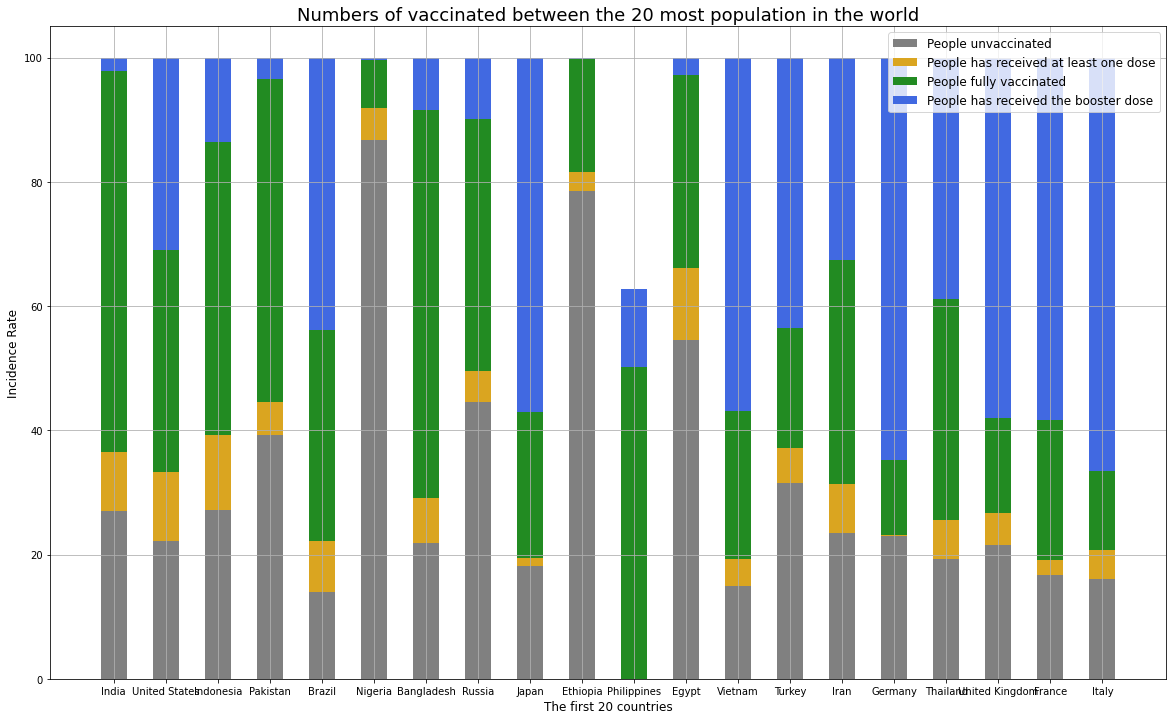

In [122]:
plt.subplots(1, figsize=(20, 12))
plt.title("Numbers of vaccinated between the 20 most population in the world", fontsize = 18)
plt.bar(graph_percents_population.index, graph_percents_population["percent_people_unvaccinated"], color = "gray", width = 0.5, label="People unvaccinated")
plt.bar(graph_percents_population.index, graph_percents_population["percent_people_vaccinated"], color = "goldenrod", bottom=graph_percents_population["percent_people_unvaccinated"], width = 0.5, label="People has received at least one dose")
plt.bar(graph_percents_population.index, graph_percents_population["percent_people_fully_vaccinated"], color = "forestgreen", bottom=graph_percents_population["percent_people_unvaccinated"]+graph_percents_population["percent_people_vaccinated"], width = 0.5, label="People fully vaccinated")
plt.bar(graph_percents_population.index, graph_percents_population["percent_total_boosters"], color = "royalblue", width = 0.5, bottom=graph_percents_population["percent_people_unvaccinated"]+graph_percents_population["percent_people_vaccinated"]+graph_percents_population["percent_people_fully_vaccinated"], label="People has received the booster dose")
plt.legend(loc=1, fontsize = 12)
plt.xlabel("The first 20 countries", fontsize = 12)
plt.ylabel("Incidence Rate", fontsize = 12)
plt.grid(True)
plt.show()

# **We are going to explore the brazilian data during the pandemic**

In [ ]:
evolution_cases_covid_brazil = evolution_cases_covid_country.query("country == 'Brazil'").copy()
evolution_cases_covid_brazil["total_cases_per_day"] = evolution_cases_covid_brazil["daily_new_cases"].cumsum()
evolution_cases_covid_brazil["total_deaths_per_day"] = evolution_cases_covid_brazil["daily_new_deaths"].cumsum()
evolution_cases_covid_brazil["moving_average_cases_7_days_previous"] = evolution_cases_covid_brazil["daily_new_cases"].rolling(window=7).mean()
evolution_cases_covid_brazil["moving_average_deaths_7_days_previous"] = evolution_cases_covid_brazil["daily_new_deaths"].rolling(window=7).mean()
evolution_cases_covid_brazil = evolution_cases_covid_brazil.reset_index()
evolution_cases_covid_brazil.drop(columns = ["index"], inplace = True)
evolution_cases_covid_brazil = evolution_cases_covid_brazil.set_index("date")

In [ ]:
evolution_cases_covid_brazil_after_first_vaccinate = evolution_cases_covid_brazil.query("date >= '2021-1-17'")
evolution_cases_covid_brazil_after_first_vaccinate

,country,daily_new_cases,active_cases,daily_new_deaths,total_cases_per_day,total_deaths_per_day,moving_average_cases_7_days_previous,moving_average_deaths_7_days_previous
date,,,,,,,,
2021-01-17,Brazil,31736.0,893522.0,518.0,8538007.0,209868.0,55059.142857,961.142857
2021-01-18,Brazil,24450.0,876994.0,460.0,8562457.0,210328.0,54499.000000,958.714286
2021-01-19,Brazil,63986.0,872791.0,1183.0,8626443.0,211511.0,54742.857143,969.285714
2021-01-20,Brazil,64611.0,890102.0,1382.0,8691054.0,212893.0,55073.428571,983.428571
2021-01-21,Brazil,60413.0,933011.0,1335.0,8751467.0,214228.0,53823.714286,1009.714286
...,...,...,...,...,...,...,...,...
2022-05-10,Brazil,20143.0,248825.0,195.0,30594387.0,664443.0,15994.142857,96.857143
2022-05-11,Brazil,23398.0,255291.0,121.0,30617785.0,664564.0,16469.285714,106.857143
2022-05-12,Brazil,21344.0,270526.0,136.0,30639129.0,664700.0,16421.000000,104.714286


In [ ]:
vaccination_brazil = covid_vaccinated_world[["location", "date", "total_vaccinations", "people_fully_vaccinated"]].query("location=='Brazil'")
vaccination_brazil = vaccination_brazil.reset_index()
vaccination_brazil.drop(columns = ["index"], inplace = True)
vaccination_brazil = vaccination_brazil.set_index("date")
vaccination_brazil

,location,total_vaccinations,people_fully_vaccinated
date,,,
2021-01-17,Brazil,112.0,NaN
2021-01-18,Brazil,1109.0,NaN
2021-01-19,Brazil,13527.0,NaN
2021-01-20,Brazil,105824.0,NaN
2021-01-21,Brazil,193699.0,NaN
...,...,...,...
2022-05-05,Brazil,431278922.0,164464910.0
2022-05-06,Brazil,431859321.0,164564155.0
2022-05-07,Brazil,432025086.0,164594075.0


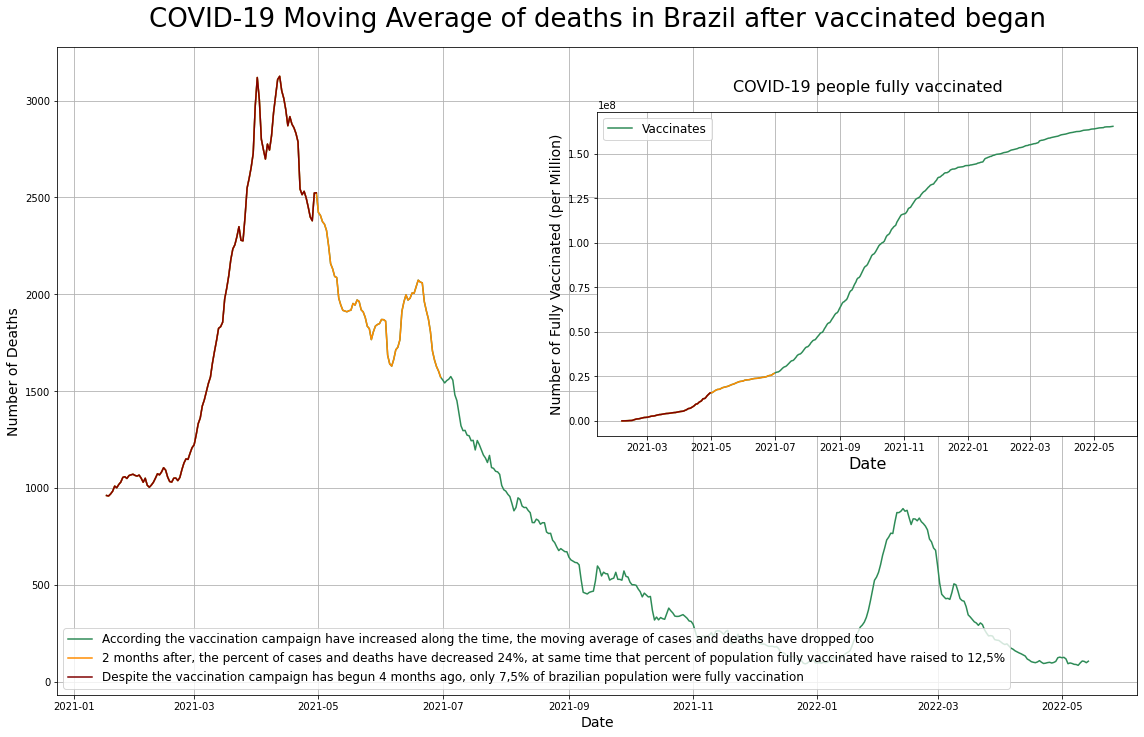

In [ ]:
fig = plt.figure(figsize=(15, 9))

death_axis = fig.add_axes([0,0,1,1])
vaccinate_axis = fig.add_axes([0.5, 0.4, 0.5, 0.5])

deaths_before_may_2021 = evolution_cases_covid_brazil_after_first_vaccinate.query("date < '2021-05-01'")
deaths_before_july_2021 = evolution_cases_covid_brazil_after_first_vaccinate.query("date < '2021-07-01'")
vaccinate_before_may_2021 = vaccination_brazil.query("date < '2021-05-01'")
vaccinate_before_july_2021 = vaccination_brazil.query("date < '2021-07-01'")

death_axis.grid(True)
death_axis.plot(evolution_cases_covid_brazil_after_first_vaccinate["moving_average_deaths_7_days_previous"], color = "seagreen", label = "According the vaccination campaign have increased along the time, the moving average of cases and deaths have dropped too")
death_axis.plot(deaths_before_july_2021["moving_average_deaths_7_days_previous"], color = "darkorange", label = "2 months after, the percent of cases and deaths have decreased 24%, at same time that percent of population fully vaccinated have raised to 12,5%")
death_axis.plot(deaths_before_may_2021["moving_average_deaths_7_days_previous"], color = "maroon", label = "Despite the vaccination campaign has begun 4 months ago, only 7,5% of brazilian population were fully vaccination")
death_axis.set_title("COVID-19 Moving Average of deaths in Brazil after vaccinated began", fontsize = 26, pad = 20)
death_axis.set_ylabel("Number of Deaths", fontsize = 14)
death_axis.set_xlabel("Date", fontsize = 14)
death_axis.legend(loc=3, fontsize = 12)

vaccinate_axis.grid(True)
vaccinate_axis.plot(vaccination_brazil["people_fully_vaccinated"].dropna(), color = "seagreen")
vaccinate_axis.plot(vaccinate_before_july_2021["people_fully_vaccinated"], color = "darkorange")
vaccinate_axis.plot(vaccinate_before_may_2021["people_fully_vaccinated"], color = "maroon")
vaccinate_axis.set_title("COVID-19 people fully vaccinated", fontsize = 16, pad = 20)
vaccinate_axis.set_ylabel("Number of Fully Vaccinated (per Million)", fontsize = 14)
vaccinate_axis.set_xlabel("Date", fontsize = 16)
vaccinate_axis.legend(["Vaccinates"], loc = "upper left", fontsize = 12)